# Analyze Product Sentiment

In [1]:
import turicreate

# Read product review data

In [2]:
products = turicreate.SFrame('amazon_baby.sframe')

# Explore data

In [3]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [4]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending = False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


In [5]:
products['name'].show()

Materializing SArray

# Examine the reivews for the most-reviewed product

In [6]:
girraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [7]:
len(girraffe_reviews)

785

In [8]:
girraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

## Build word count vectors

In [9]:
girraffe_reviews.head()

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


# Define what is positive and negative sentiment

In [10]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])
girraffe_reviews['word_count'] = turicreate.text_analytics.count_words(girraffe_reviews['review'])

In [11]:
girraffe_reviews = girraffe_reviews[girraffe_reviews['rating'] != 3]
girraffe_reviews['sentiment'] = girraffe_reviews['rating'] >= 4 

In [12]:
girraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1


# Train our sentiment classifier

In [13]:
training_data,test_data = girraffe_reviews.random_split(0.8,seed=0)

In [14]:
sentiment_model = turicreate.logistic_classifier.create(training_data,
                                                        target='sentiment',
                                                        features=['word_count'],
                                                        validation_set = test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 573

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2895

Number of coefficients      : 2896

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 1.025935     | 0.876091          | 0.853333            |

| 1         | 6        | 2.500000  | 1.067156     | 0.987784          | 0.866667            |

| 2         | 7        | 2.500000  | 1.083781     | 1.000000          | 0.886667            |

| 3         | 8        | 2.500000  | 1.098674     | 1.000000          | 0.893333            |

| 4         | 9        | 2.500000  | 1.115121     | 1.000000          | 0.893333            |

| 9         | 15       | 2.500000  | 1.197173     | 1.000000          | 0.873333            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the sentiment classifier to better understand the Giraffe reviews

In [15]:
girraffe_reviews['predicted_sentiment'] = sentiment_model.predict(girraffe_reviews,output_type = 'probability')

In [16]:
girraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1


In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['agg.path.chunksize'] = 1000


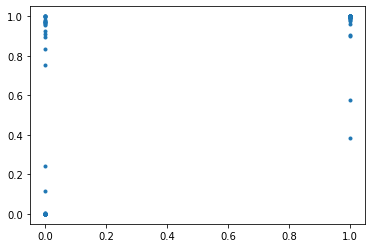

In [19]:
plt.plot(girraffe_reviews['sentiment'],girraffe_reviews['predicted_sentiment'],'.')

# Sort the Giraffe reviews according to predicted sentiment

In [20]:
girraffe_reviews = girraffe_reviews.sort('predicted_sentiment' ,ascending=False)

In [21]:
girraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, 'who': ...",1
Vulli Sophie the GiraffeTeether ...,Sophie is a classic toythat many parents get at ...,4.0,"{'without': 1.0,'versus': 1.0, 'need': ...",1
Vulli Sophie the GiraffeTeether ...,I held off on gettingthis teether thinking ...,5.0,"{'your': 1.0, 'away':1.0, 'be': 1.0, 'just': ...",1
Vulli Sophie the GiraffeTeether ...,"I had put Sophie on myregistry, but no one ...",5.0,"{'did': 1.0, 'glad': 1.0,'buy': 1.0, 'conclusi ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'around': 1.0,'explore': 1.0, 'they': ...",1
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'teether': 1.0, 'than':1.0, 'much': 1.0, '7': ...",1
Vulli Sophie the GiraffeTeether ...,There is a reason thereis so much hype ...,5.0,"{'would': 1.0, 'what':1.0, 'happened': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'makers': 1.0, 'or':1.0, 'take': 1.0, 'can': ...",1
Vulli Sophie the GiraffeTeether ...,We just got our adorableSophie this week and ...,5.0,"{'paint': 1.0, 'rubber':1.0, 'from': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,my 6-month-old daughterLOVES Sophie. She has so ...,4.0,"{'don': 1.0, 'friends':1.0, 'recommend': 1.0, ...",1


# Counting number of particular words in the review

In [22]:
selected_words = ['awesome_counter', 'great_counter', 'fantastic_counter', 'amazing_counter', 'love_counter',
                  'horrible_counter', 'bad_counter', 'terrible_counter', 
                  'awful_counter', 'wow_counter', 'hate_counter']

In [23]:
def awesome_counter(a):
    if 'awesome' in a:
        y = int(a['awesome'])
        return y
    else :
        return 0;

def great_counter(a):
    if 'great' in a:
        y = int(a['great'])
        return y
    else :
        return 0;
    
def fantastic_counter(a):
    if 'fantastic' in a:
        y = int(a['fantastic'])
        return y
    else :
        return 0;
    
def amazing_counter(a):
    if 'amazing' in a:
        y = int(a['amazing'])
        return y
    else :
        return 0;
    
def love_counter(a):
    if 'love' in a:
        y = int(a['love'])
        return y
    else :
        return 0;

def horrible_counter(a):
    if 'horrible' in a:
        y = int(a['horrible'])
        return y
    else :
        return 0;

def bad_counter(a):
    if 'bad' in a:
        y = int(a['bad'])
        return y
    else :
        return 0;

def terrible_counter(a):
    if 'terrible' in a:
        y = int(a['terrible'])
        return y
    else :
        return 0;
    
    
def awful_counter(a):
    if 'awful' in a:
        y = int(a['awful'])
        return y
    else :
        return 0;
    
def wow_counter(a):
    if 'wow' in a:
        y = int(a['wow'])
        return y
    else :
        return 0;
    
    
def hate_counter(a):
    if 'hate' in a:
        y = int(a['hate'])
        return y
    else :
        return 0;
    

In [24]:
products['awesome_counter'] = products['word_count'].apply(awesome_counter)
products['great_counter'] = products['word_count'].apply(great_counter)
products['fantastic_counter'] = products['word_count'].apply(fantastic_counter)
products['amazing_counter'] = products['word_count'].apply(amazing_counter)
products['love_counter'] = products['word_count'].apply(love_counter)
products['horrible_counter'] = products['word_count'].apply(horrible_counter)
products['bad_counter'] = products['word_count'].apply(bad_counter)
products['terrible_counter'] = products['word_count'].apply(terrible_counter)
products['awful_counter'] = products['word_count'].apply(awful_counter)
products['wow_counter'] = products['word_count'].apply(wow_counter)
products['hate_counter'] = products['word_count'].apply(hate_counter)

In [25]:
products.head()

name,review,rating,word_count,awesome_counter,great_counter
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ...",0,0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",0,0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",0,0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",0,0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",0,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",0,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",0,0


In [26]:
products = products[products['rating'] != 3]
products['sentiment'] = products['rating'] >=4

In [27]:
products.head()

name,review,rating,word_count,awesome_counter,great_counter
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",0,0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",0,0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",0,0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",0,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",0,1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",0,0
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",0,0


# Training the data with more constraints

In [28]:
training_data,test_data = products.random_split(0.8,seed =0)

In [29]:
selected_words_model = turicreate.logistic_classifier.create(training_data,target = 'sentiment',
                                                             features = selected_words)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 126775

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.157940     | 0.847470          | 0.846096            |

| 2         | 3        | 0.258972     | 0.847557          | 0.846096            |

| 3         | 4        | 0.360940     | 0.847691          | 0.846546            |

| 4         | 5        | 0.452494     | 0.847722          | 0.847145            |

| 5         | 6        | 0.542710     | 0.847722          | 0.847145            |

| 6         | 7        | 0.633987     | 0.847722          | 0.847145            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [62]:
selected_words_model.coefficients.sort('value',ascending=False)

name,index,class,value,stderr
love_counter,None,1,1.369236437199226,0.02891183564929141
(intercept),None,1,1.3348798114720564,0.00915512272362944
awesome_counter,None,1,1.1299063825867381,0.0864910819691884
amazing_counter,None,1,1.0817203572421303,0.10107066151063904
fantastic_counter,None,1,0.9084369873231618,0.11577068747288075
great_counter,None,1,0.8716271231869788,0.019547107563530553
wow_counter,None,1,0.018189388561490254,0.1657020717843054
bad_counter,None,1,-0.9896522910946453,0.03949208335619362
hate_counter,None,1,-1.3424114393847733,0.07894273274069721
awful_counter,None,1,-2.0403116746943386,0.10318123124492821


In [31]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.846414845063656,
 'auc': 0.692714388099495,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  156  |
 |      0       |        0        |  369  |
 |      0       |        1        |  4959 |
 |      1       |        1        | 27820 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9158093984034236,
 'log_loss': 0.3962060972757871,
 'precision': 0.8487141157448367,
 'recall': 0.9944237918215614,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 

In [32]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.8444331011289935,
 'auc': 0.7803996391211765,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  925  |
 |      1       |        0        |  778  |
 |      0       |        1        |  4403 |
 |      1       |        1        | 27198 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.91303691021703,
 'log_loss': 0.8029950727897857,
 'precision': 0.8606689661719565,
 'recall': 0.9721904489562482,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0 

# Checking the model on a particular product

In [35]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [36]:
diaper_champ_reviews.head()

name,review,rating,word_count,awesome_counter,great_counter
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'more': 1.0, 'trash': ...",0,0
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'system': 1.0, 'try':1.0, 're': 1.0, 'still': ...",0,0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",0,0
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",0,0
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'outside': 1.0, 'day': ...",0,0
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'huge': 1.0,'special': 1.0, 'good': ...",0,0
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'yuck': 1.0, 'clean':1.0, 'trash': 3.0, 'is': ...",0,0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",0,0
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'will': 1.0, ...",0,0
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'no': 1.0, 'regular':1.0, 'part': 1.0, ...",0,0


In [42]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews,
                                                                      output_type='probability')

In [43]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment',ascending=False)

In [44]:
diaper_champ_reviews.head()

name,review,rating,word_count,awesome_counter,great_counter
Baby Trend Diaper Champ,"This is absolutely, byfar, the best diaper ...",5.0,"{'praises': 1.0, 'sing':1.0, 'glad': 1.0, ...",0,0
Baby Trend Diaper Champ,We have been using ourDiaper Champ for almost ...,5.0,"{'baby': 1.0, 'modern':1.0, 'required': 1.0, ...",0,0
Baby Trend Diaper Champ,"As new parents, westarted out with the ...",5.0,"{'ll': 1.0, 'than': 1.0,'more': 3.0, 'any': 1.0, ...",0,0
Baby Trend Diaper Champ,I'm SO glad that we askedthe sales associate at ...,5.0,"{'ll': 1.0, 'this': 1.0,'compare': 1.0, 'any': ...",0,0
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'no': 1.0, 'regular':1.0, 'part': 1.0, ...",0,0
Baby Trend Diaper Champ,I own both the DiaperChamp and the &quot;o ...,5.0,"{'child': 1.0, 'first':1.0, 'about': 1.0, ...",0,0
Baby Trend Diaper Champ,I've read all of thereviews of those of you ...,2.0,"{'never': 1.0, 'day':1.0, 'buy': 1.0, ...",0,0
Baby Trend Diaper Champ,I was a diaper genie useruntil my son was about 1 ...,5.0,"{'better': 1.0, 'way':1.0, 'this': 1.0, ...",0,2
Baby Trend Diaper Champ,I originally bought theDiaper Genie when my son ...,5.0,"{'highly': 1.0, 'genies':1.0, '12': 1.0, 'in': ...",0,0
Baby Trend Diaper Champ,Daiper Champ is a truechampion. Earlier i was ...,5.0,"{'with': 1.0, 'handle':1.0, 'kid': 1.0, 'even': ...",0,0


In [63]:
selected_words_model.predict(diaper_champ_reviews[0:1],output_type='probability')

dtype: float
Rows: 1
[0.9832646108988903]

In [55]:
print(products['awesome_counter'].sum())
print(products['love_counter'].sum())
print(products['hate_counter'].sum())
print(products['bad_counter'].sum())
print(products['great_counter'].sum())
print(products['wow_counter'].sum())
print(products['amazing_counter'].sum())
print(products['terrible_counter'].sum())
print(products['awful_counter'].sum())

3892
41994
1107
4183
55791
425
2628
1146
687


TypeError: 'SFrame' object is not callable